In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pyccl as ccl

import sys
sys.path.append('../cluster_abundance/')
import CL_COUNT_DATAOPS_cluster_abundance_covariance as covariance
import CL_COUNT_class_cluster_abundance as cl_count
import CL_COUNT_class_likelihood as lnL

%load_ext autoreload
%autoreload 2

%matplotlib inline

# Extract DM haloes from the SkySim catalog in a given mass and redshift range. 

In [2]:
zmin = 0.
zmax = 1.

## Use the pre-extracted halo catalog stored at CC-IN2P3 or NERSC
You may skip the step above by directly using pre-extracted SkySim halo catalog. These are stored as `hdf5` at CC-IN2P3 and NERSC. These files contains all DM halos of SkySim5000 with $M_{\rm fof}>1\times 10^{13}$M$_\odot$ and $z\in[0,1.2]$. Richness information (not used here) is also available in those files, along with some other halo-related columns. SkySim input cosmology and sky area are also saved as metadata in the file.

You may choose among:
- `skysim_halos_z=0-1.2_mfof_gt_1e13_small.hdf5` for the `small` sky area (~57 deg2)
- `skysim_halos_z=0-1.2_mfof_gt_1e13_image.hdf5` for the `image` sky area (~440 deg2)
- `skysim_halos_z=0-1.2_mfof_gt_1e13_full.hdf5` for the `full` sky area (~5200 deg2)

**Path to access the files at CC-IN2P3:**
`/sps/lsst/users/ccombet/SkySim5000/hdf5`

**Path to access the files at NERSC:**
`/global/u1/c/ccombet/SkySim5000/hdf5`

Comment/uncomment accordingly in the cell below

In [118]:
import pandas as pd

path_to_cat = '/sps/lsst/users/ccombet/SkySim5000/hdf5' # CC-in2p3
# path_to_cat = '/global/u1/c/ccombet/SkySim5000/hdf5' # NERSC

size = 'image' # other options are 'image' (440 deg2) and 'small' (57 deg2)

with pd.HDFStore(os.path.join(path_to_cat,f'skysim_halos_z=0-1.20_mfof_gt_1.00e+13_{size}.hdf5')) as store:
    dm_halos = store['skysim']
    metadata = store.get_storer('skysim').attrs.metadata

cosmo_ss  = metadata['cosmo']
sky_area = metadata['sky_area']
N_cl = len(dm_halos['halo_mass'])
print(f'There are {N_cl} halos with Mfof > 1e13 Msun and z=[0,1.2] in {sky_area} deg2')

There are 249485 halos with Mfof > 1e13 Msun and z=[0,1.2] in 439.78986 deg2


In [119]:
cosmo_ss

FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)

## Filter on redshift and mass ranges

**Caution**: if using the pre-extracted halo catalog, make sure you do not require here mass and redshift ranges larger than the ones specified above.

NB: SkySim5000 M200c masses are in units of Msun/h

In [120]:
zmin = 0.25
zmax = 1.
mmin = 5.e13 # Msun. 
mmax = 1.e15 # Msun

16582 left in the [5.00e+13,1.00e+15[ mass range and [0.25,1.00[ redshift range


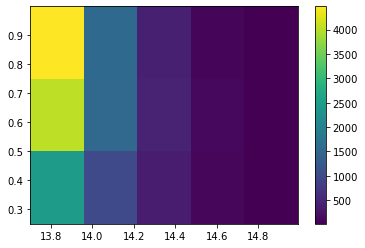

In [121]:
dm_halos['M200c'] = dm_halos['baseDC2/sod_halo_mass']/cosmo_ss.h # sod_halo_mass = M200,c in Msun/h, needs conversion

filt1 = dm_halos['redshift'] >= zmin
filt2 = dm_halos['redshift'] < zmax
filt3 = dm_halos['M200c'] >= mmin 
filt4 = dm_halos['M200c'] < mmax
filt = filt1 & filt2 & filt3 & filt4

data_m_ss = np.array(dm_halos['M200c'][filt]) # M200,c [Msun]
data_z_ss = np.array(dm_halos['redshift'][filt])

print(f"{len(data_m_ss)} left in the [{mmin:.2e},{mmax:.2e}[ mass range and [{zmin:.2f},{zmax:.2f}[ redshift range")
hist2d = plt.hist2d(np.log10(data_m_ss), data_z_ss, bins=[5,3]);
plt.colorbar()

In [122]:
count = hist2d[0]
logm_edges = hist2d[1]
z_edges = hist2d[2]

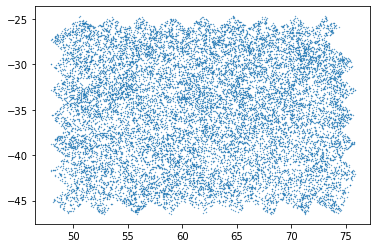

In [123]:
plt.scatter(dm_halos['ra'][filt],dm_halos['dec'][filt], s=0.1)

# Measure count covariance matrix

In [124]:
Covariance = covariance.Covariance_matrix()

In [126]:
hp_res = 8
cov_jk = Covariance.compute_jackknife_covariance_healpy(catalog = dm_halos, proxy_colname = 'M200c', 
                                           redshift_colname = 'redshift', z_corner = z_edges, 
                                           proxy_corner = 10**logm_edges, ra_colname = 'ra', 
                                           dec_colname = 'dec', n_power = hp_res, N_delete = 1)

Number of JK regions: 8460
Number of JK regions: 8460
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450


In [127]:
cov_bs = Covariance.compute_boostrap_covariance(catalog = dm_halos, proxy_colname = 'M200c', 
                                    redshift_colname = 'redshift', proxy_corner = 10**logm_edges, 
                                    z_corner = z_edges, n_boot = 100)

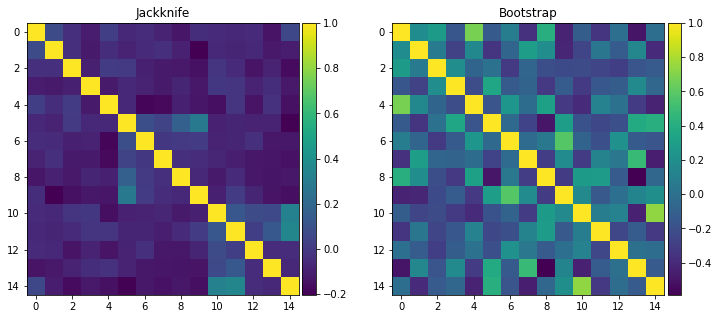

In [128]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
im0 = axes[0].imshow(np.corrcoef(Covariance.Jackknife_covariance_matrix))
im1 = axes[1].imshow(np.corrcoef(Covariance.Bootstrap_covariance_matrix))
axes[0].set_title('Jackknife')
axes[1].set_title('Bootstrap')
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0, orientation='vertical')
fig.colorbar(im1, cax=cax1, orientation='vertical')

# Predict model

In [90]:
# Grid for HMF evaluation
z_grid = np.linspace(zmin, zmax, 500)
logm_grid = np.linspace(np.log10(mmin),np.log10(mmax), 500)

# Check likelihood with the right comsology
cosmo = ccl.Cosmology(Omega_c = cosmo_ss.Om0 - cosmo_ss.Ob0, Omega_b = cosmo_ss.Ob0, 
                      h = cosmo_ss.h, sigma8 = cosmo_ss.sigma8, n_s=cosmo_ss.n_s)

massdef = ccl.halos.MassDef(200, 'critical')
hmd = ccl.halos.MassFuncTinker08(cosmo, mass_def=massdef)

clc = cl_count.ClusterAbundance()
clc.set_cosmology(cosmo = cosmo, hmd = hmd, massdef = massdef)
clc.sky_area = sky_area*(np.pi/180.)*(np.pi/180.)

In [91]:
clc.compute_multiplicity_grid_MZ(z_grid = z_grid, logm_grid = logm_grid)
count_prediction = clc.Cluster_Abundance_MZ(zbin_edges = z_edges, proxybin_edges = logm_edges, method = 'grid')

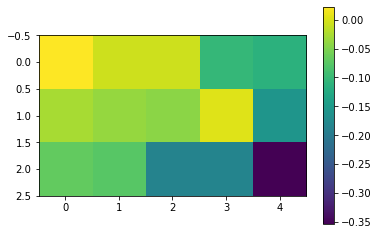

In [92]:
plt.imshow((count_prediction-count.T)/count.T)
plt.colorbar()

# Binned Gaussian Likelihood

In [93]:
Likelihood = lnL.Likelihood()

In [94]:
lnL_Binned_Gaussian = Likelihood.lnLikelihood_Binned_Gaussian(Abundance, count.T, 
                                                              Covariance.Jackknife_covariance_matrix)
print(Likelihood.lnL_Binned_Gaussian)

-285.87029677165475


# Likelihood Maximization to get ($\sigma_8, \Omega_m$) (using `Minuit`) 

In [95]:
clc = cl_count.ClusterAbundance()
clc.sky_area = sky_area*(np.pi/180.)*(np.pi/180.)
Likelihood = lnL.Likelihood()

def m_log_likelihood(sigma8, Omega_m):
    cosmo = ccl.Cosmology(Omega_c = Omega_m - cosmo_ss.Ob0, Omega_b = cosmo_ss.Ob0, 
                      h = cosmo_ss.h, sigma8 = sigma8, n_s=cosmo_ss.n_s, T_CMB=2.725)
    
    hmd = ccl.halos.MassFuncTinker08(cosmo, mass_def=massdef)
    clc.set_cosmology(cosmo = cosmo, hmd = hmd, massdef = massdef)
    
    if ltype == 'BG' or ltype == 'BP':
        clc.compute_multiplicity_grid_MZ(z_grid = z_grid, logm_grid = logm_grid)
        abundance_predict = clc.Cluster_Abundance_MZ(zbin_edges = z_edges, 
                                                     proxybin_edges = logm_edges, 
                                                     method=method)

    if ltype == 'BG':
        Likelihood.lnLikelihood_Binned_Gaussian(abundance_predict, count.T, Covariance.Jackknife_covariance_matrix)
        return -Likelihood.lnL_Binned_Gaussian
    if ltype == 'BP':
        Likelihood.lnLikelihood_Binned_Poissonian(abundance_predict, count.T)
        return -Likelihood.lnL_Binned_Poissonian


In [102]:
from iminuit import Minuit

ltype='BG' 
method='grid'
z_grid = np.linspace(zmin, zmax, 500)
logm_grid = np.linspace(np.log10(mmin),np.log10(mmax), 500)

m1 = Minuit(m_log_likelihood, 0.8, 0.3)
m1.limits['sigma8'] = [0.7,0.9]
m1.limits['Omega_m'] = [0.2,0.4]
m1.errordef = 0.5 # because dealing with likelihood function
m1.migrad() # finds minimum 
m1.hesse() # computes errors 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.66                      │              Nfcn = 70               │
│ EDM = 4.68e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigma8  │  0.8191   │  0.0027   │            │            │   0.7   │   0.9   │       │
│ 1 │ Omega_m │  0.2512   │  0.0028   │            │            │   0.2   │   0.4   │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────┐
│         │    sigma8   Omega_m │
├─────────┼─────────────────────┤
│  sigma8 │  7.01e-06 -5.67e-06 │
│ Omega_m │ -5.67e-06  7.63e-06 │
└─────────┴─────────────────────┘

In [97]:
ltype='BP' 

m2 = Minuit(m_log_likelihood, 0.8, 0.3)
m2.limits['sigma8'] = [0.7,0.9]
m2.limits['Omega_m'] = [0.2,0.4]
m2.errordef = 0.5 # because dealing with likelihood function
m2.migrad() # finds minimum 
m2.hesse()  # computes errors 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.252e+05                 │              Nfcn = 60               │
│ EDM = 1.39e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigma8  │   0.821   │   0.002   │            │            │   0.7   │   0.9   │       │
│ 1 │ Omega_m │  0.2506   │  0.0019   │            │            │   0.2   │   0.4   │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────┐
│         │    sigma8   Omega_m │
├─────────┼─────────────────────┤
│  sigma8 │  4.02e-06 -3.54e-06 │
│ Omega_m │ -3.54e-06  3.51e-06 │
└─────────┴─────────────────────┘

In [98]:
from matplotlib.patches import Ellipse

def _make_ellipse(mean, cov, ax, color=None, label = None, ls = '-',):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi 
    for i in [3]:
        ell = Ellipse(mean, 2 * i * v[0] ** 0.5, 2 * i * v[1] ** 0.5,
                                  180 + angle,
                                  linewidth=2, facecolor = 'none',edgecolor=color, ls = ls)
        ax.add_patch(ell)
#    ax.plot([],[],ls, color = color, label = label)

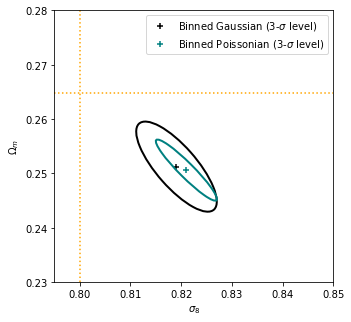

In [103]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
_make_ellipse(m1.values, m1.covariance, ax1, color='black', ls = '-')
_make_ellipse(m2.values, m2.covariance, ax1, color='teal', ls = '-')
ax1.set_ylim([0.23,0.28])
ax1.set_xlim([0.795,0.85])
ax1.axvline(cosmo_ss.sigma8, color='orange', ls=':')
ax1.axhline(cosmo_ss.Om0, color='orange', ls=':')
ax1.scatter(m1.values['sigma8'],m1.values['Omega_m'], color='black', marker='+', label='Binned Gaussian (3-$\sigma$ level)')
ax1.scatter(m2.values['sigma8'],m2.values['Omega_m'], color='teal', marker='+', label='Binned Poissonian (3-$\sigma$ level)')
ax1.set_xlabel('$\sigma_8$')
ax1.set_ylabel('$\Omega_m$')
ax1.legend()

fig.savefig(f'contours_{size}_{mmin:.2e}_{mmax:.2e}_{hp_res:.2e}.png')